# ECE-221710405015-M.Kathik

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets.mnist import load_data

In [3]:
(train_digits,train_labels),(test_digits,test_labels)=load_data()
print(train_digits.shape)
print(test_digits.shape)

11493376/11490434 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)


In [4]:
import pandas as pd
pd.Series(train_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Length: 60000, dtype: uint8>

In [5]:
pd.Series(test_labels).value_counts

<bound method IndexOpsMixin.value_counts of 0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Length: 10000, dtype: uint8>

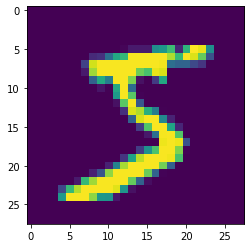

In [6]:
plt.imshow(train_digits[0])

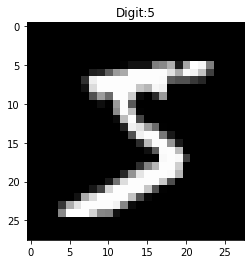

In [7]:
plt.title("Digit:"+str(train_labels[0]))
plt.imshow(train_digits[0],cmap="gray")

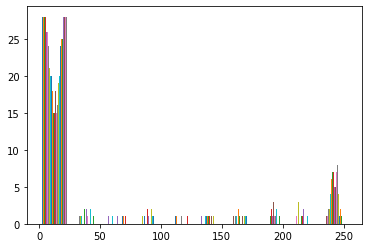

In [8]:
plt.hist(train_digits[0])
plt.show()

In [9]:
samp=np.random.randint(train_digits.shape[0],size=16)
samp

array([30488, 53979, 42528, 16156, 12659, 29017, 33746, 28709, 42082,
       15284, 30129, 30890, 22044, 46711, 10423, 31226])

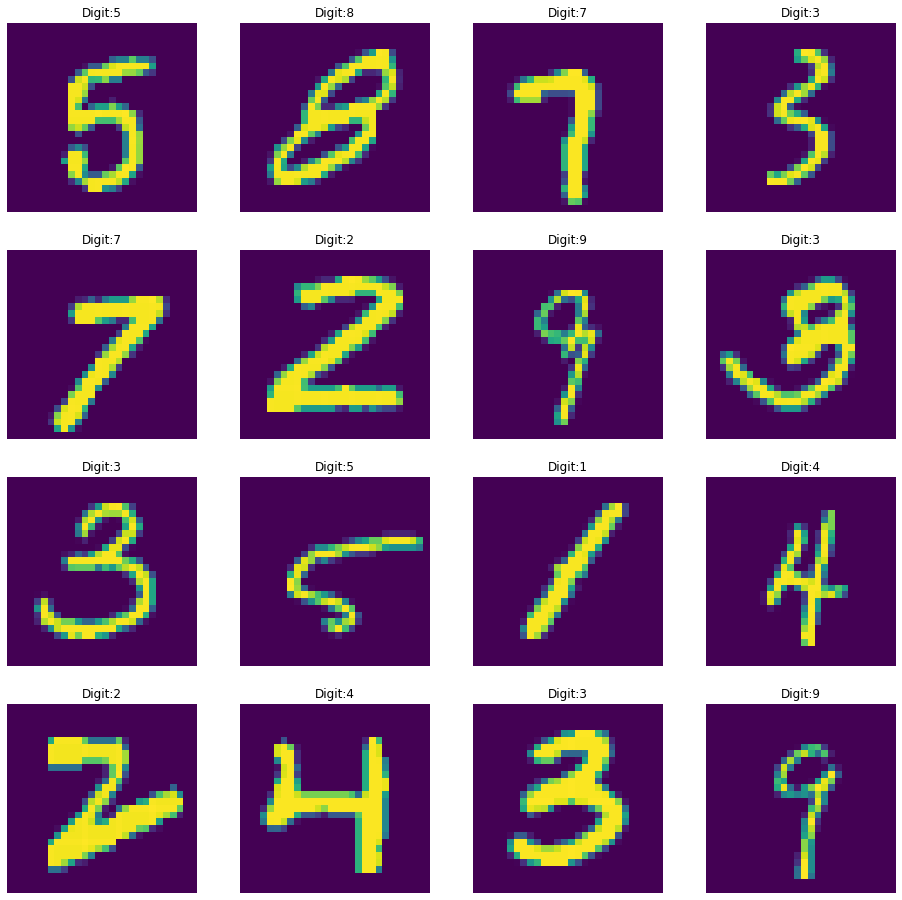

In [10]:
plt.figure(figsize=(16,16))
j=1
for i in samp:
  plt.subplot(4,4,j)
  plt.imshow(train_digits[i])
  plt.title("Digit:"+str(train_labels[i]))
  plt.axis("off")
  j=j+1

In [11]:
train_digits_sc=train_digits/255.0
test_digits_sc=test_digits/255.0

In [12]:
from keras.utils import to_categorical

In [13]:
train_labels_cat=to_categorical(train_labels)

In [14]:
test_labels_cat=to_categorical(test_labels)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(train_digits_sc,train_labels_cat,test_size=0.1,random_state=32)
print(x_train.shape)
print(x_val.shape)
print(y_train.shape)
print(y_val.shape)

(54000, 28, 28)
(6000, 28, 28)
(54000, 10)
(6000, 10)


In [16]:
from keras.models import Sequential
from keras.layers import Dense,Flatten

model = Sequential()
# first layer we need to mention the input shape

model.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model.add(Dense(128,activation='relu'))# 784 * 128+128
model.add(Dense(128,activation='relu'))# 
model.add(Dense(64,activation='relu'))
model.add(Dense(256,activation='relu'))
#Final layer
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 144,458
Trainable params: 144,458
Non-trainable params: 0
__________________________________________________

In [17]:
model.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [18]:
history=model.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Epoch 1/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2488 - accuracy: 0.9252 - val_loss: 0.1654 - val_accuracy: 0.9503
Epoch 2/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.1147 - accuracy: 0.9650 - val_loss: 0.1236 - val_accuracy: 0.9660
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0845 - accuracy: 0.9741 - val_loss: 0.1226 - val_accuracy: 0.9673
Epoch 4/5
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0658 - accuracy: 0.9795 - val_loss: 0.1012 - val_accuracy: 0.9733
Epoch 5/5
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0534 - accuracy: 0.9835 - val_loss: 0.1113 - val_accuracy: 0.9725


In [19]:
model.evaluate(test_digits_sc,test_labels_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.1076 - accuracy: 0.9723


[0.10761958360671997, 0.9722999930381775]

In [20]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [21]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.7514475e-06, 4.1928951e-04, 6.7049958e-04, 1.2256163e-04,
        2.3038367e-06, 2.0038083e-06, 7.7251183e-09, 9.9849474e-01,
        5.9764363e-05, 2.2605546e-04]], dtype=float32)

In [22]:
model.predict(test_digits_sc[:10])

array([[2.75144998e-06, 4.19289892e-04, 6.70499867e-04, 1.22561745e-04,
        2.30383671e-06, 2.00381010e-06, 7.72511832e-09, 9.98494744e-01,
        5.97644175e-05, 2.26055679e-04],
       [1.12499015e-06, 8.73321060e-09, 9.99996662e-01, 1.67640633e-06,
        1.05107798e-08, 1.66635648e-08, 2.43065532e-08, 2.28822998e-07,
        2.49119495e-07, 5.85903244e-12],
       [4.13018688e-06, 9.99803841e-01, 1.02992235e-05, 1.02263516e-06,
        5.09338533e-05, 3.47620016e-07, 6.42783516e-06, 5.64959664e-05,
        6.46591943e-05, 1.75598404e-06],
       [9.99986291e-01, 3.69992176e-10, 2.56690464e-06, 6.25922425e-08,
        6.08799979e-08, 3.01747264e-07, 9.22775780e-06, 6.81543755e-09,
        5.41189024e-07, 7.00521070e-07],
       [1.90575378e-09, 1.63081229e-08, 3.15041788e-08, 1.89552984e-10,
        9.99982834e-01, 6.93407609e-10, 3.52319285e-10, 9.25613151e-08,
        1.24239952e-08, 1.71008523e-05],
       [2.55498975e-07, 9.99979496e-01, 2.52539394e-07, 6.70462725e-08,
   

In [23]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7], dtype=int64)

In [24]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

Instructions for updating:
Please use `model.predict()` instead.


array([[2.7514475e-06, 4.1928951e-04, 6.7049958e-04, 1.2256163e-04,
        2.3038367e-06, 2.0038083e-06, 7.7251183e-09, 9.9849474e-01,
        5.9764363e-05, 2.2605546e-04]], dtype=float32)

In [25]:
history.history

{'loss': [0.24880936741828918,
  0.11467684805393219,
  0.08445004373788834,
  0.06576348096132278,
  0.05337424948811531],
 'accuracy': [0.9252222180366516,
  0.9649814963340759,
  0.9741296172142029,
  0.9795185327529907,
  0.9834629893302917],
 'val_loss': [0.1654229611158371,
  0.123588927090168,
  0.12260468304157257,
  0.1011991873383522,
  0.11128561198711395],
 'val_accuracy': [0.9503333568572998,
  0.9660000205039978,
  0.9673333168029785,
  0.9733333587646484,
  0.9725000262260437]}

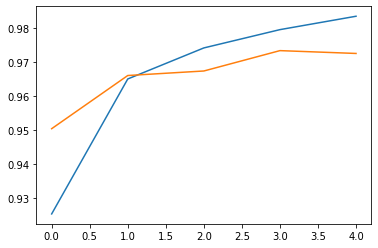

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [27]:
model1 = Sequential()
# first layer we need to mention the input shape

model1.add(Flatten(input_shape=(28,28)))
## 784 pixel values as input to this Dense. 128 Neurons in the layers
model1.add(Dense(128,activation='relu'))# 784 * 128+128
model1.add(Dense(256,activation='relu'))# 
model1.add(Dense(64,activation='relu'))
model1.add(Dense(256,activation='relu'))
#Final layer
model1.add(Dense(10,activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               16640     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                2570      
Total params: 169,162
Trainable params: 169,162
Non-trainable params: 0
________________________________________________

In [28]:
model1.compile(optimizer='adam',loss=tf.keras.losses.CategoricalCrossentropy(),metrics=['accuracy'])

In [29]:
history=model1.fit(x=x_train,y=y_train,epochs=5,validation_data=(x_val,y_val),batch_size=32)

Epoch 1/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2603 - accuracy: 0.9223 - val_loss: 0.1398 - val_accuracy: 0.9578
Epoch 2/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1123 - accuracy: 0.9664 - val_loss: 0.1064 - val_accuracy: 0.9712
Epoch 3/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0818 - accuracy: 0.9749 - val_loss: 0.0963 - val_accuracy: 0.9718
Epoch 4/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9807 - val_loss: 0.1041 - val_accuracy: 0.9715
Epoch 5/5
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9838 - val_loss: 0.0827 - val_accuracy: 0.9775


In [30]:
model1.evaluate(test_digits_sc,test_labels_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0765 - accuracy: 0.9770


[0.07652747631072998, 0.9769999980926514]

In [31]:
print(test_digits_sc.shape)
print(test_digits_sc[0].shape)
print(np.expand_dims(test_digits_sc[0],axis=0).shape)

(10000, 28, 28)
(28, 28)
(1, 28, 28)


In [32]:
model.predict(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.7514475e-06, 4.1928951e-04, 6.7049958e-04, 1.2256163e-04,
        2.3038367e-06, 2.0038083e-06, 7.7251183e-09, 9.9849474e-01,
        5.9764363e-05, 2.2605546e-04]], dtype=float32)

In [33]:
model.predict(test_digits_sc[:10])

array([[2.75144998e-06, 4.19289892e-04, 6.70499867e-04, 1.22561745e-04,
        2.30383671e-06, 2.00381010e-06, 7.72511832e-09, 9.98494744e-01,
        5.97644175e-05, 2.26055679e-04],
       [1.12499015e-06, 8.73321060e-09, 9.99996662e-01, 1.67640633e-06,
        1.05107798e-08, 1.66635648e-08, 2.43065532e-08, 2.28822998e-07,
        2.49119495e-07, 5.85903244e-12],
       [4.13018688e-06, 9.99803841e-01, 1.02992235e-05, 1.02263516e-06,
        5.09338533e-05, 3.47620016e-07, 6.42783516e-06, 5.64959664e-05,
        6.46591943e-05, 1.75598404e-06],
       [9.99986291e-01, 3.69992176e-10, 2.56690464e-06, 6.25922425e-08,
        6.08799979e-08, 3.01747264e-07, 9.22775780e-06, 6.81543755e-09,
        5.41189024e-07, 7.00521070e-07],
       [1.90575378e-09, 1.63081229e-08, 3.15041788e-08, 1.89552984e-10,
        9.99982834e-01, 6.93407609e-10, 3.52319285e-10, 9.25613151e-08,
        1.24239952e-08, 1.71008523e-05],
       [2.55498975e-07, 9.99979496e-01, 2.52539394e-07, 6.70462725e-08,
   

In [34]:
model.predict_classes(np.expand_dims(test_digits_sc[0],axis=0))

array([7], dtype=int64)

In [35]:
model.predict_proba(np.expand_dims(test_digits_sc[0],axis=0))

array([[2.7514475e-06, 4.1928951e-04, 6.7049958e-04, 1.2256163e-04,
        2.3038367e-06, 2.0038083e-06, 7.7251183e-09, 9.9849474e-01,
        5.9764363e-05, 2.2605546e-04]], dtype=float32)

In [36]:
history.history

{'loss': [0.26028740406036377,
  0.11231078952550888,
  0.0817566066980362,
  0.06365533918142319,
  0.05256751924753189],
 'accuracy': [0.9222777485847473,
  0.9663518667221069,
  0.9749259352684021,
  0.9806666374206543,
  0.9837592840194702],
 'val_loss': [0.13976843655109406,
  0.10638175159692764,
  0.09628649801015854,
  0.10409389436244965,
  0.08268637955188751],
 'val_accuracy': [0.9578333497047424,
  0.9711666703224182,
  0.971833348274231,
  0.9714999794960022,
  0.9775000214576721]}

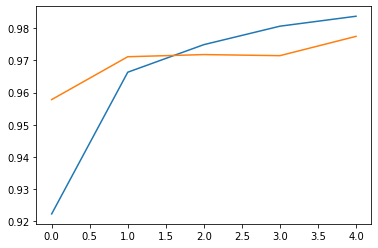

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])